In [130]:
# Basic Imports
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os

from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

import warnings
warnings.filterwarnings('ignore')


In [131]:
# Import the dataset 
file_path = r'D:\ml-algorithms\datasets\autos_dataset.csv'

In [132]:
# Read the dataset 
df = pd.read_csv(file_path)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [133]:
# Feature Names preasent in the dataset
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### Basic Info

In [134]:
print("Shape of the data set (rows, columns)",df.shape)
print("\nColumn Types: \n", df.dtypes)

Shape of the data set (rows, columns) (205, 26)

Column Types: 
 symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object


In [135]:
# Missing Values per column 
print("Missing Values: \n",df.isnull().sum())

Missing Values: 
 symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [136]:
# duplicate rows
print("\nSample duplicate rows: ")
display(df[df.duplicated()])


Sample duplicate rows: 


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


In [137]:
# Describe Numerical features
print("Describe Numerical: \n")
df.describe().T

Describe Numerical: 



,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.0,0.0,1.0,2.0,3.0
wheel-base,205.0,98.756585,6.021776,86.6,94.5,97.0,102.4,120.9
length,205.0,174.049268,12.337289,141.1,166.3,173.2,183.1,208.1
width,205.0,65.907805,2.145204,60.3,64.1,65.5,66.9,72.3
height,205.0,53.724878,2.443522,47.8,52.0,54.1,55.5,59.8
curb-weight,205.0,2555.565854,520.680204,1488.0,2145.0,2414.0,2935.0,4066.0
engine-size,205.0,126.907317,41.642693,61.0,97.0,120.0,141.0,326.0
compression-ratio,205.0,10.142537,3.972040,7.0,8.6,9.0,9.4,23.0
city-mpg,205.0,25.219512,6.542142,13.0,19.0,24.0,30.0,49.0
highway-mpg,205.0,30.751220,6.886443,16.0,25.0,30.0,34.0,54.0


In [1]:
### Describe Categoricals
print("Describe Categoricals:\n")
df.describe(include='object').T

Describe Categoricals:



NameError: name 'df' is not defined

## **1.Data Cleaning**

- Check how many '?' values exist in each column
- Replace '?' with np.nan and correct datatypes

In [139]:
(df == '?').sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [140]:
df[df.isin(['?']).any(axis=1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
14,1,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880


#### 🔧 1. Identify columns to convert

Based on the data, the following columns **should be numeric but are `object`**:

* `normalized-losses`
* `bore`
* `stroke`
* `price`
* `horsepower `
- Convert '?' to NaN


In [141]:
df.replace('?',np.nan,inplace=True)
for col in df.columns:
    # Try numeric conversion where possible
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

In [142]:
# Now Check the NaN/ missing values that are preasent in the dataseet
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [143]:
## Remove Duplicates
duplicates = df.duplicated()
print(duplicates.any()) # Returns True if duplicate are exists

False


In [144]:
## Count total duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Total duplicate rows: {num_duplicates}")

Total duplicate rows: 0


In [145]:
## Display duplicated rows
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg, price]
Index: []

[0 rows x 26 columns]


In [146]:
## Remove duplicate rows
# df_cleaned = df.drop_duplicates()
df.drop_duplicates(inplace=True)

In [147]:
## Fix inconsistant formating (String columns to lower, strip)
cat_col = df.select_dtypes(include='object').columns
for col in cat_col:
    df[col] = df[col].str.lower().str.strip()

In [212]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Detect the Missing Values

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

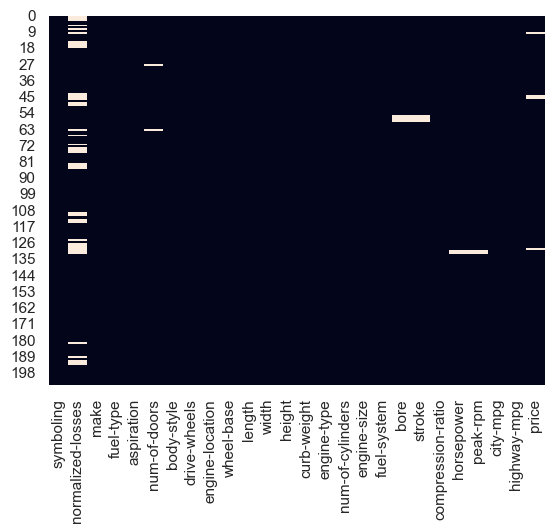

In [213]:
# check the features where missing preasent in the dataset
sns.heatmap(df.isnull(),cbar=False)
df.isnull().sum()

### Check object-type columns for unique non-numeric values

In [215]:
# Check unique values in object columns
for col in df.select_dtypes(include='object').columns:
    print(f"\nUnique values in `{col}`: ")
    print(df[col].unique())


Unique values in `make`: 
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Unique values in `fuel-type`: 
['gas' 'diesel']

Unique values in `aspiration`: 
['std' 'turbo']

Unique values in `num-of-doors`: 
['two' 'four' nan]

Unique values in `body-style`: 
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

Unique values in `drive-wheels`: 
['rwd' 'fwd' '4wd']

Unique values in `engine-location`: 
['front' 'rear']

Unique values in `engine-type`: 
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

Unique values in `num-of-cylinders`: 
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

Unique values in `fuel-system`: 
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


---

## Part1.  Fill the missing value (with the help of stastics)

In [216]:
# check missing value count and percentage
missing_count = df.isnull().sum()
missing_percent = (missing_count / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing_Values': missing_count,
    'Percentage':missing_percent
})
print(missing_info[missing_info['Missing_Values']>0])

                   Missing_Values  Percentage
normalized-losses              41    20.00000
num-of-doors                    2     0.97561
bore                            4     1.95122
stroke                          4     1.95122
horsepower                      2     0.97561
peak-rpm                        2     0.97561
price                           4     1.95122


## Part2. Check if data is skewed or Normally Distributed

- If |skewness| < 0.5 → approximately normal → use mean
- If 0.5 < |skewness| < 1 → moderately skewed → median is safer
- If |skewness| > 1 → highly skewed → definitely use median

#### Price

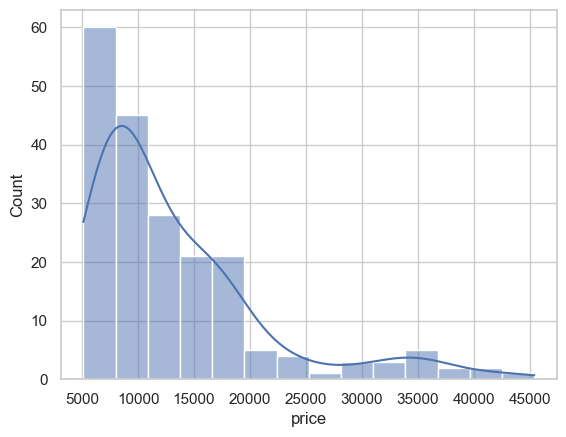

In [217]:
## Price
sns.histplot(df['price'],kde=True)
plt.show()

In [218]:
print('Skewness of price: ',df['price'].skew())

Skewness of price:  1.8096753390980749


#### Horsepower

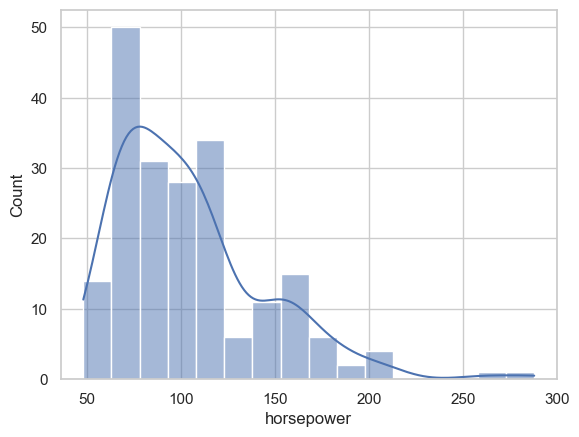

In [219]:
sns.histplot(df['horsepower'],kde=True)
plt.show()

In [220]:
print("Skewness of Horsepower: ",df['horsepower'].skew())

Skewness of Horsepower:  1.3910294937929355


#### normalized-losses

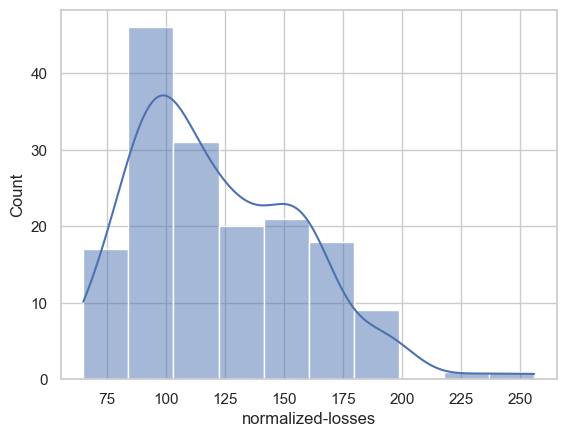

In [221]:
sns.histplot(df['normalized-losses'],kde=True)
plt.show()

In [222]:
print("Skewness of normalized-losses : ",df['normalized-losses'].skew())

Skewness of normalized-losses :  0.7659764175950632


#### Bore

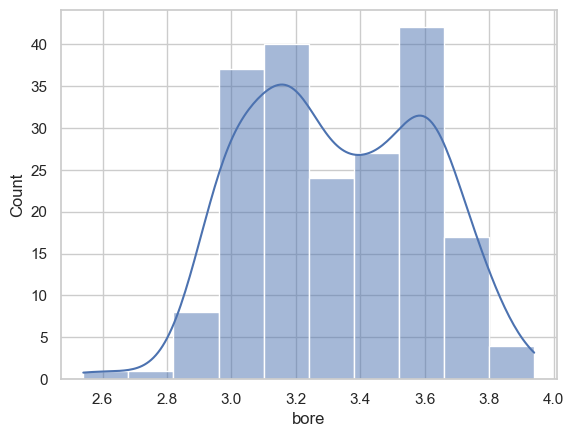

In [223]:
sns.histplot(df['bore'],kde=True)
plt.show()

In [224]:
print("Skewness of bore: ",df['bore'].skew())

Skewness of bore:  0.020015510309870796


#### stroke

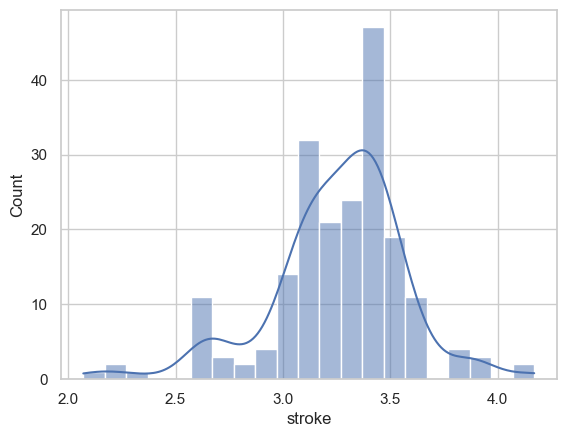

In [226]:
sns.histplot(df['stroke'],kde=True)
plt.show()

In [225]:
print("skewness of stroke: ",df['stroke'].skew())

skewness of stroke:  -0.6831221940577341


----

- Skewness of price:  1.8096753390980749
- Skewness of Horsepower:  1.3910294937929355
- Skewness of normalized-losses :  0.7659764175950632
- Skewness of bore:  0.020015510309870796
- skewness of stroke:  -0.6831221940577341

**Condition to use mean, median, mode if skewness is preasent in the dataset**
- If |skewness| < 0.5 → approximately normal → use mean
- If 0.5 < |skewness| < 1 → moderately skewed → median is safer
- If |skewness| > 1 → highly skewed → definitely use median

| Feature               | Skewness  | Imputation Method |
| --------------------- | --------- | ----------------- |
| **price**             | **1.81**  | **Median**        |
| **horsepower**        | **1.39**  | **Median**        |
| **normalized-losses** | **0.76**  | **Median**        |
| **bore**              | **0.02**  | **Mean**          |
| **stroke**            | **-0.68** | **Median**        |


### Check for outliers using IQR

In [227]:
# By IQR

# Select numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Detect Outliers
outliers_indices = {}

for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Store the indices of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
    outliers_indices[col] = list(outliers)

for col, indices in outliers_indices.items():
    print(f"{col}: {len(indices)} outliers")

symboling: 0 outliers
normalized-losses: 1 outliers
wheel-base: 3 outliers
length: 1 outliers
width: 8 outliers
height: 0 outliers
curb-weight: 0 outliers
engine-size: 10 outliers
bore: 0 outliers
stroke: 20 outliers
compression-ratio: 28 outliers
horsepower: 6 outliers
peak-rpm: 2 outliers
city-mpg: 2 outliers
highway-mpg: 3 outliers
price: 14 outliers


### Visulize the outliers

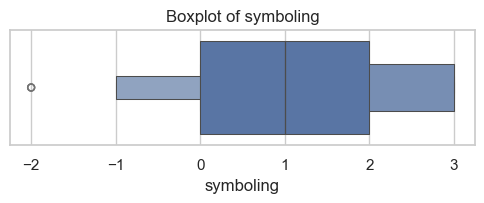

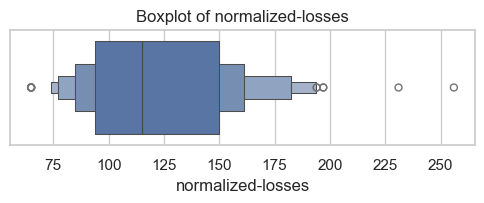

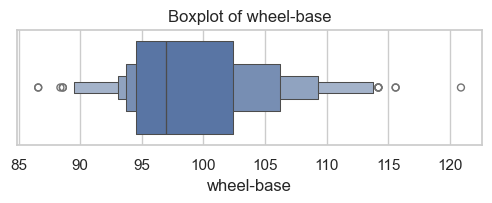

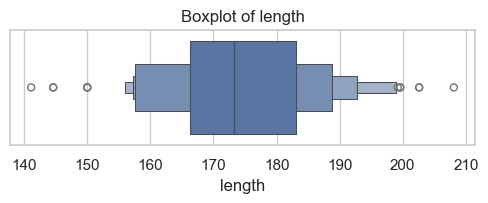

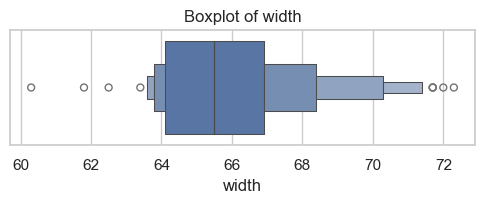

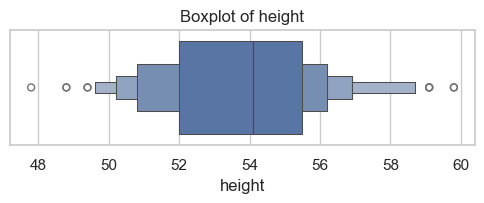

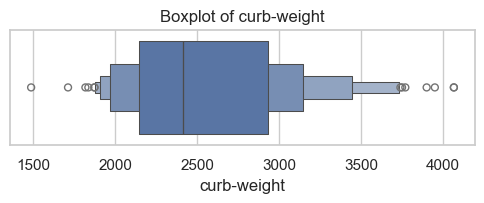

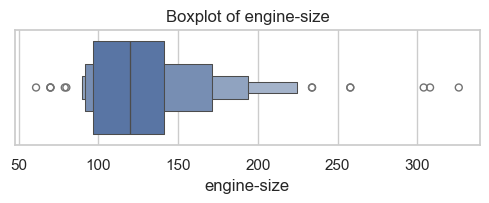

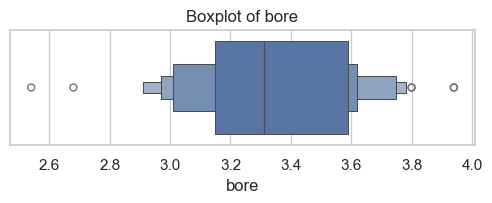

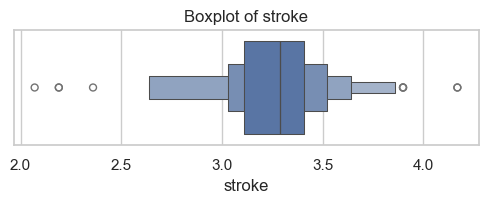

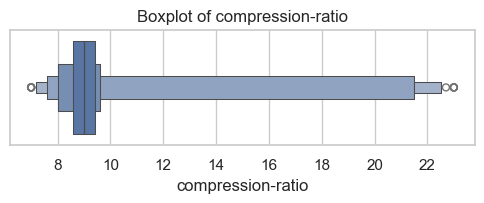

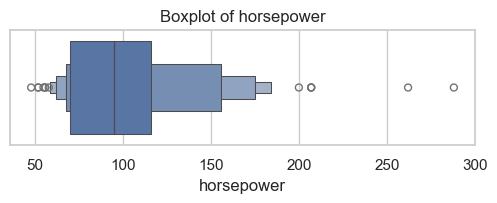

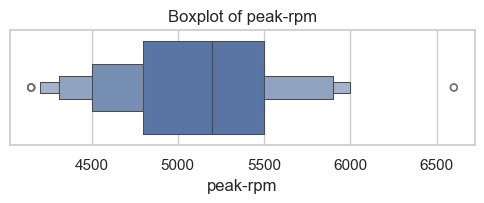

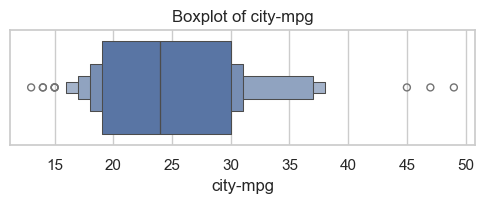

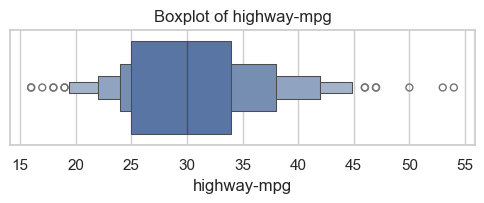

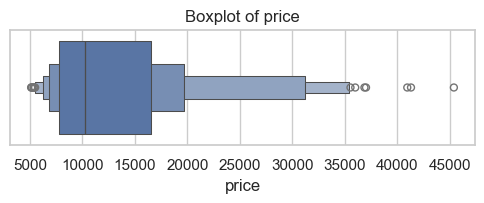

In [228]:
for col in numeric_columns:
    plt.figure(figsize=(6,1.5))
    sns.boxenplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

## 1.Fill the missing values

- mode() Returns a Series:

In [ ]:
# mode() returns a pandas Series (even for single value)
print(df['num-of-doors'].mode())
# Output: 
# 0    four
# dtype: object

In [ ]:
print(type(df['num-of-doors'].mode()))
# Output: <class 'pandas.core.series.Series'>

- median() Returns a Scalar:

In [ ]:
# median() returns a single number directly
print(df['normalized-losses'].median())
# Output: 150.5

In [ ]:
print(type(df['normalized-losses'].median()))  
# Output: <class 'numpy.float64'> or <class 'float'>
# No indexing needed - it's already the value

In [ ]:
# Similar pattern with other statistical functions:

# Returns scalar directly:
df['column'].mean()     # No [0] needed
df['column'].std()      # No  needed  
df['column'].median()   # No  needed

# Returns Series (needs indexing):
df['column'].mode()     # Needs 

# For multiple modes example:
# If data has two modes, mode() returns both:
# 0    value1
# 1    value2
# That's why you need  to get the first one

* Reason Behind This Design:
    - Mode can have multiple values: A dataset can have multiple modes (bi-modal, tri-modal), so pandas returns a Series to handle all possible modes
    - Median is always single: There's only one median value, so pandas returns it directly as a scalar

In [ ]:
# Drop rows with missing target as this is our target column we can do that
df.dropna(subset=['price'], inplace=True)

In [229]:
missing_info = df.isnull().sum().sort_values(ascending=False)
missing_info = missing_info[missing_info > 0]
print(missing_info)

normalized-losses    41
stroke                4
price                 4
bore                  4
horsepower            2
peak-rpm              2
num-of-doors          2
dtype: int64


| Column         | Type        | % Missing | Strategy                            |
| -------------- | ----------- | --------- | ----------------------------------- |
| `stroke`       | Numeric     | 10%       | Mean or Median                      |
| `horsepower`   | Numeric     | 2%        | Median (robust to outliers)         |
| `num-of-doors` | Categorical | 1%        | Mode                                |
| `price`        | Target      | 15%       | **Drop rows** (don't impute target) |


- Before filling missing values ensure all columns are numericmm

In [231]:
df[['normalized-losses', 'horsepower', 'bore', 'stroke', 'price']] = df[['normalized-losses', 'horsepower', 'bore', 'stroke', 'price']].apply(pd.to_numeric, errors='coerce')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [232]:
## Fill the Missing Values
df['price'].fillna(df['price'].median(), inplace=True)
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)
df['normalized-losses'].fillna(df['normalized-losses'].median(), inplace=True)
df['bore'].fillna(df['bore'].mean(), inplace=True)
df['stroke'].fillna(df['stroke'].median(), inplace=True)

In [233]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

We choose **median** over **mean or mode** in the following situations — and in your dataset, this applies well. Here's why:

---

### 🔍 Why Use **Median**?

1. **Robust to Outliers**:

   * If a column is **numerical** and **skewed** (which your data like `price`, `horsepower`, etc. are), **mean** can be heavily affected by extreme values (outliers).
   * **Median**, on the other hand, is resistant to outliers — it represents the "middle" better when data isn’t symmetric.

   **Example**:
   If you have values: `[1000, 1050, 1100, 1150, 1,000,000]`

   * Mean = very high
   * Median = unaffected

2. **Your Data is Skewed**:

   * You mentioned skewness like `price = 1.8` and `horsepower = 1.3`, etc. This confirms that your data is **right-skewed**, so **median is the safer choice**.

---

### 🧠 When to Use What?

| Imputation Method | Use When...                                                   |
| ----------------- | ------------------------------------------------------------- |
| **Mean**          | Data is **normally distributed** (symmetric, no/few outliers) |
| **Median**        | Data is **skewed** or has **outliers**                        |
| **Mode**          | Data is **categorical** or **discrete with repetitions**      |

---

### ⚙️ For your case:

* `normalized-losses`, `stroke`, `bore`, `horsepower`, `price`, `peak-rpm` → **Median**
* `num-of-doors` → **Mode** (because it's categorical)

---

### For categorical

In [178]:
# df['num-of-doors'].fillna(df['num-of-doors'].mode()[0], inplace=True)

In [179]:
# df.isnull().sum()

In [180]:
# Convert words to numbers
# As this is regression proble statement we can benifit form it

In [181]:
# word_to_number = {
#     'two':2,
#     'four':4
# }
# df['num-of-doors'] = df['num-of-doors'].map(word_to_number)

In [182]:
# df.info()

#### No_of_cylinders categorical feature

In [183]:
# df['num-of-cylinders'].value_counts()

#### 🔹 `df['num-of-cylinders'].map()`

**Use when:**

* The **categories represent actual numeric values** with **ordinal or quantitative meaning**.
* You want the model to **understand numerical relationships** (e.g., 8 cylinders > 4 cylinders).
* You're going to use models that **benefit from numeric continuity**, like **Linear Regression, Decision Trees, XGBoost**, etc.

✅ **Best for:**
`'num-of-cylinders'` → because “eight” cylinders literally means 8, and more cylinders usually mean more power.

---

#### 🔹 `pd.get_dummies(df, columns=['col'])`

**Use when:**

* The feature is **categorical** but **not ordinal** (no natural order).
* The text labels are **just categories**, not meaningful numbers.
* You don’t want to imply any **ranking or distance** between the categories.
* You’re using models that handle one-hot encoded features well, such as **Logistic Regression, KNN, SVM**, etc.

✅ **Best for:**
`'body-style'`, `'fuel-type'`, `'drive-wheels'`, etc.

---

#### ❗What happens if you use `get_dummies()` on `num-of-cylinders`?

* You lose the **numerical meaning** of cylinder count.
* Instead of understanding "8 > 4 > 2", the model sees just separate binary flags like:

  * `cylinder_two`
  * `cylinder_four`
  * `cylinder_six`
* For many regression models, this **reduces the model's ability to learn trends** across numerical ranges.

---

#### ✅ Conclusion

| Feature Type                             | Best Approach       |
| ---------------------------------------- | ------------------- |
| Numeric meaning (e.g., cylinders, doors) | `.map()` to numeric |
| Pure categories (e.g., fuel type, brand) | `pd.get_dummies()`  |

Let me know if you want help listing all columns in your dataset by type so you can choose the right encoding for each.


In [184]:
# cylinder_map = {
#     'two': 2,
#     'three': 3,
#     'four': 4,
#     'five': 5,
#     'six': 6,
#     'eight': 8,
#     'twelve': 12
# }

# df['number-of-cylinders'] = df['num-of-cylinders'].map(cylinder_map)

### Univariate Analysis

- In Univariate Analysis, we analyze one feature at a time to understand its distribution, central tendency, and frequency. Since all the features you listed are categorical, here's what you would typically look for and how to do it:

In [185]:
# categorical_features = ['make','fuel-type','aspiration','body-style',
#                         'drive-wheels','engine-location','engine-type',
#                         'num-of-cylinders','fuel-system']

# for col in categorical_features:
#     plt.figure(figsize=(8, 4))
#     sns.countplot(data=df, x=col, order=df[col].value_counts().index)
#     plt.xticks(rotation=45)
#     plt.title(f'Distribution of {col}')
#     plt.tight_layout()
#     plt.show()

### Make (car brand)

In [186]:
# df['make'].value_counts().plot(kind='bar', figsize=(12,5), title='Car Make Distribution')
# plt.xlabel('Make')
# plt.ylabel('Count')
# plt.xticks(rotation=90)
# plt.show()


### fuel-type
 - What to check: Petrol vs Diesel distribution.

In [187]:
# df['fuel-type'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Fuel Type Distribution')
# plt.ylabel('')
# plt.show()

### body-style
- What to check:Popular car body types (sedan, hatchback, etc.)

In [188]:
# df['body-style'].value_counts().plot(kind='bar', title='Body Style Distribution')
# plt.xlabel('Body Style')
# plt.ylabel('Count')
# plt.show()

### drive-wheels
- What to check: FWD, RWD, 4WD frequency.

In [189]:
# sns.countplot(data=df, x='drive-wheels')
# plt.title('Drive Wheels Count')
# plt.show()

### engine-location
- What to check: Most cars likely have front engine.

In [190]:
# df['engine-location'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Engine Location Distribution')
# plt.ylabel('')
# plt.show()

### engine-type
- What to check: Frequency of each engine type (ohc, ohcv, etc.)

In [191]:
# df['engine-type'].value_counts().plot(kind='bar', title='Engine Type Count')
# plt.xlabel('Engine Type')
# plt.ylabel('Count')
# plt.show()

### num-of-cylinders
- What to check:Distribution of cylinder count (already discussed).

In [192]:
# df['num-of-cylinders'].value_counts().sort_index().plot(kind='bar', title='Number of Cylinders Distribution')
# plt.xlabel('Cylinders')
# plt.ylabel('Count')
# plt.show()

### Fuel-system
- What to check: Most/least used fuel system (mpfi, 2bbl, etc.)

In [193]:
# df['fuel-system'].value_counts().plot(kind='bar', title='Fuel System Distribution')
# plt.xlabel('Fuel System')
# plt.ylabel('Count')
# plt.show()

### Bivariate/Multivariate Analysis

### **We have a target variable like `price` (continuous):**

We’ll do **Bivariate Analysis** of each categorical feature **with respect to price** using:

1. **Box plots** – To see price distribution per category
2. **GroupBy mean/median plots** – To compare average prices
3. **Count plots** – To understand frequency per category

In [194]:
# sns.boxenplot(x='fuel-type',y='price',data=df)
# plt.title('Fuel Type Vs Price')
# plt.show()

In [195]:
# df.groupby('fuel-type')['price'].mean().plot(kind='bar',title='Avg Price by Fuel Type')
# plt.ylabel('Average Price')
# plt.show()

In [196]:
# # List of categorical features
# categorical_features = [
#     'make',
#     'fuel-type',
#     'aspiration',
#     'body-style',
#     'drive-wheels',
#     'engine-location',
#     'engine-type',
#     'num-of-cylinders',
#     'fuel-system'
# ]

# # Set plot style
# sns.set(style="whitegrid")

# for feature in categorical_features:
#     plt.figure(figsize=(12, 5))

#     # Boxplot
#     plt.subplot(1, 2, 1)
#     sns.boxplot(x=feature, y='price', data=df)
#     plt.xticks(rotation=45)
#     plt.title(f'{feature} vs Price (Boxplot)')

#     # Bar plot of mean prices
#     plt.subplot(1, 2, 2)
#     df.groupby(feature)['price'].mean().sort_values().plot(kind='bar')
#     plt.ylabel('Average Price')
#     plt.title(f'Average Price by {feature}')
#     plt.xticks(rotation=45)

#     plt.tight_layout()
#     plt.show()

### Multivariate Analysis

In [197]:
# sns.catplot(x='drive-wheels', y='price', hue='body-style', kind='box', data=df)
# plt.title('Drive Wheels & Body Style vs Price')
# plt.show()

In [198]:
# # Pivot table heatmap
# pivot = df.pivot_table(index='drive-wheels', columns='body-style', values='price', aggfunc='mean')
# sns.heatmap(pivot, annot=True, cmap='coolwarm')
# plt.title('Average Price by Drive-Wheels and Body-Style')
# plt.show()

- Key Insights to Look For:
    - Does any category have a significantly higher/lower price?
    - Do combinations of features (like drive-wheels + body-style) affect price?
    - Are certain categories dominant (class imbalance)?

In [199]:
# List of categorical features for analysis
# cat_features = [
#     'make', 'fuel-type', 'aspiration', 'body-style',
#     'drive-wheels', 'engine-location', 'engine-type',
#     'num-of-cylinders', 'fuel-system'
# ]

In [200]:
# for i in range(len(cat_features)):
#     for j in range(i+1, len(cat_features)):
#         plt.figure(figsize=(12,6))
#         sns.boxenplot(x=cat_features[i],y='price',hue=cat_features[j],data=df)
#         plt.title(f'{cat_features[i]} vs Price by {cat_features[j]}')
#         plt.xticks(rotation=45)
#         plt.tight_layout()
#         plt.show()

In [201]:
# for i in range(len(cat_features)):
#     for j in range(i+1,len(cat_features)):
#         pivot = pd.pivot_table(df, index=cat_features[i], columns=cat_features[j], values='price', aggfunc='mean')
#         plt.figure(figsize=(12, 6))
#         sns.heatmap(pivot, annot=True, fmt='.0f', cmap='coolwarm')
#         plt.title(f'Average Price Heatmap: {cat_features[i]} vs {cat_features[j]}')
#         plt.xticks(rotation=45)
#         plt.yticks(rotation=0)
#         plt.tight_layout()
#         plt.show()

### Let’s proceed with bivariate/multivariate analysis for numerical columns.

#### Pairwise Relationship (Multivariate)

In [202]:
# Automatically detect numerical columns
# numerical_cols = df.select_dtypes(include=['int64','float']).columns.tolist()
# print("Numerical Columns: ",numerical_cols)

In [203]:
# Pairplot for numerical features
# sns.pairplot(df[numerical_cols])
# plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
# plt.show()

#### Univariate analysis (Distribution & Boxplot)

In [204]:
# for col in numerical_cols:
#     print(f"Analyzing: {col}")
    
#     # Histogram
#     sns.histplot(df[col], kde=True)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')
#     plt.show()

#     # Boxplot
#     sns.boxplot(y=df[col])
#     plt.title(f'Boxplot of {col}')
#     plt.ylabel(col)
#     plt.show()

#### Multivariate analysis (Numerical vs Target):


In [205]:
# for col in numerical_cols:
#     if col != 'price':
#         sns.scatterplot(x=df[col], y=df['price'])
#         plt.title(f'{col} vs Price')
#         plt.xlabel(col)
#         plt.ylabel('Price')
#         plt.show()


### Multivariate analysis (Numerical Vs Target)

In [206]:
# for col in numerical_cols:
#     if col != 'price':
#         sns.scatterplot(x=df[col], y=df['price'])
#         plt.title(f'{col} vs Price')
#         plt.xlabel(col)
#         plt.ylabel('Price')
#         plt.show()

In [207]:
# # Compute correlation matrix
# corr_matrix = df[numerical_cols].corr()

# # Plot the heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap of Numerical Features')
# plt.show()

### Stastical Distribution Mean, Median, Mode,... etc

In [208]:
# Stastical analysis of the dataset Mean, Median, Mode,....etc
# df.describe().T

### Identify Highly Correlated Pairs
- We'll first find pairs with a high correlation (say, > 0.7 or < -0.7)

In [209]:
# # Find correlation matrix
# corr_matrix = df[numerical_cols].corr()

# # Unstack and sort correlations (excluding self-correlation = 1)
# corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
# high_corr_pairs = [(pair, corr) for pair, corr in corr_pairs.items() if pair[0] != pair[1] and abs(corr) > 0.7]

# # Show top 5 highly correlated pairs
# for pair, corr in high_corr_pairs[:5]:
#     print(f"{pair[0]} and {pair[1]}: Correlation = {corr:.2f}")

### Plot Pairplots (or Scatterplots) for Highly Correlated Pairs

In [210]:
# # Plot scatterplots for the top 3 highly correlated feature pairs
# top_n = 3
# for i, (pair, corr) in enumerate(high_corr_pairs[:top_n]):
#     plt.figure(figsize=(6, 4))
#     sns.scatterplot(data=df, x=pair[0], y=pair[1])
#     plt.title(f'{pair[0]} vs {pair[1]} (Corr: {corr:.2f})')
#     plt.tight_layout()
#     plt.show()